In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('C:/Users/user/Downloads/day.csv')

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
workday=np.array(df.workingday)
workday=workday.reshape(-1,1)

In [7]:
cnt=np.array(df.cnt)
cnt=cnt.reshape(-1,1)

In [8]:
register=np.array(df.registered)
register=register.reshape(-1,1)

In [9]:
casual=np.array(df.casual)
casual=casual.reshape(-1,1)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
r_train,r_test,c_train,c_test,cnt_train,cnt_test=train_test_split(register,casual,cnt,test_size=0.3,random_state=87)

In [12]:
workday_train,workday_test,cnt_train,cnt_test=train_test_split(workday,cnt,test_size=0.3,random_state=87)

In [13]:
type(cnt_train)

numpy.ndarray

In [14]:
r=LinearRegression()

In [15]:
r.fit(r_train,cnt_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
result=r.predict(r_test)

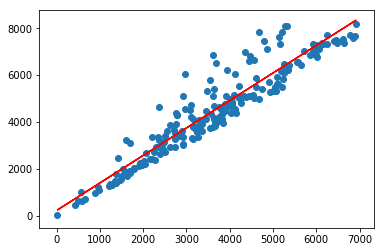

In [17]:
plt.plot(r_test,result,'r')
plt.scatter(r_test,cnt_test)

In [18]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [28]:
weathersit=np.array(df.weathersit)
weathersit=weathersit.reshape(-1,1)
season=np.array(df.season).reshape(-1,1)
workday=np.array(df.workingday).reshape(-1,1)
holiday=np.array(df.holiday).reshape(-1,1)

In [29]:
X = np.concatenate((season,weathersit,workday,holiday), axis=1)

In [32]:
X_train,X_test,cnt_train,cnt_test=train_test_split(X,cnt,test_size=0.4,random_state=87)

In [36]:
r2=LinearRegression()

In [37]:
r2.fit(X_train,cnt_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

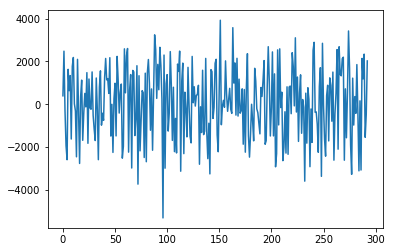

In [60]:
result=r2.predict(X_test)
diff=result-cnt_test
plt.plot(np.arange(0,len(diff),1).reshape(-1,1),diff)